In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [78]:
# import CSV of Cleaned data and create DF
df = pd.read_csv("MastersWinners.csv")
df = df.drop(columns='Unnamed: 0')
df.head()
cluster_df = df.drop(columns=['Player Name', 'Season', 'Label'])
cluster_df.head()
number_of_rows = len(cluster_df.index)
print(number_of_rows)
cluster_df.head()

11223


,Accuracy Rating - (RATING),Scoring Rating - (RATING),Power Rating - (RATING),Putting Rating - (RATING),Short Game Rating - (RATING)
0,6.3,7.84506,7.1,7.740683,5.1
1,5.5,8.00000,8.7,8.200000,6.4
2,6.0,8.20000,8.0,8.100000,7.0
3,6.1,8.00000,7.5,8.400000,6.6
4,5.5,8.20000,6.8,8.600000,6.7


In [58]:
print(cluster_df.columns.values)

['Accuracy Rating - (RATING)' 'Scoring Rating - (RATING)'
 'Power Rating - (RATING)' 'Putting Rating - (RATING)'
 'Short Game Rating - (RATING)']


In [59]:
print(cluster_df.isna().sum())

Accuracy Rating - (RATING)      0
Scoring Rating - (RATING)       0
Power Rating - (RATING)         0
Putting Rating - (RATING)       0
Short Game Rating - (RATING)    0
dtype: int64


In [60]:
# Create X variable for cluster data
from sklearn.datasets.samples_generator import make_blobs

X = np.array(cluster_df.astype(float))

In [61]:
print(X)

[[6.3        7.84506024 7.1        7.74068273 5.1       ]
 [5.5        8.         8.7        8.2        6.4       ]
 [6.         8.2        8.         8.1        7.        ]
 ...
 [6.70630003 7.84506024 5.93962396 7.74068273 6.19731164]
 [6.70630003 7.84506024 5.93962396 7.74068273 6.19731164]
 [6.70630003 7.84506024 5.93962396 7.74068273 6.19731164]]


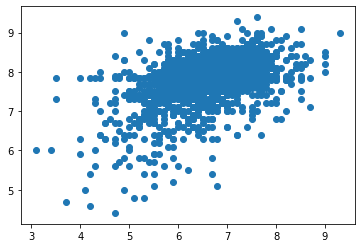

In [62]:
# Plot and show scatter
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [63]:
# Create a kmeans model using k = 12
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X)

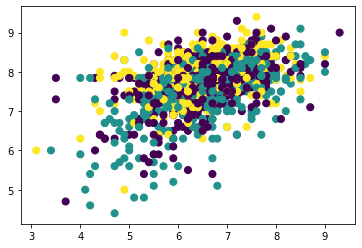

In [64]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [65]:
# Print the cluster centers and cluster labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [66]:
centers

array([[6.70759163, 7.84474025, 5.93481782, 7.7393212 , 6.19731591],
       [6.72373737, 7.69837167, 3.41388889, 7.77363733, 6.32848104],
       [6.67834941, 7.97283798, 8.13258307, 7.72656887, 6.08592181]])

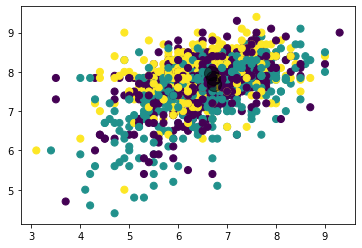

In [67]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()

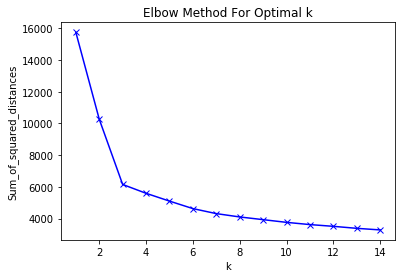

In [68]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [79]:

cluster = kmeans.labels_
print(len(cluster))
print(len(df))

11223
11223


In [81]:
df['Cluster'] = cluster.tolist()

In [90]:
df.groupby(['Label']).count()
winners = df[df['Label'] == 1]
winners.head(50)


,Player Name,Season,Accuracy Rating - (RATING),Scoring Rating - (RATING),Power Rating - (RATING),Putting Rating - (RATING),Short Game Rating - (RATING),Label,Cluster
100,Adam Scott,2011,7.3000,8.30000,8.400000,7.700000,6.100000,1,2
102,Adam Scott,2013,7.1000,8.20000,8.500000,7.500000,5.600000,1,2
565,Angel Cabrera,2011,6.4000,7.70000,8.800000,8.300000,4.900000,1,2
567,Angel Cabrera,2013,6.0000,7.80000,8.400000,7.300000,5.200000,1,2
608,Anthony Kim,2010,6.3000,8.00000,7.300000,7.900000,6.600000,1,2
945,Bernhard Langer,2016,6.7063,7.84506,5.939624,7.740683,6.197312,1,0
1281,Brandt Snedeker,2013,7.2000,8.40000,5.400000,8.300000,6.600000,1,0
1567,Bubba Watson,2012,7.1000,8.50000,9.900000,7.500000,5.900000,1,2
1569,Bubba Watson,2014,7.1000,8.40000,9.800000,7.800000,6.000000,1,2
1573,Bubba Watson,2018,6.4000,7.84506,9.200000,7.740683,6.300000,1,2


In [91]:
winners.groupby(['Cluster']).count()

,Player Name,Season,Accuracy Rating - (RATING),Scoring Rating - (RATING),Power Rating - (RATING),Putting Rating - (RATING),Short Game Rating - (RATING),Label
Cluster,,,,,,,,
0,23,23,23,23,23,23,23,23
1,3,3,3,3,3,3,3,3
2,41,41,41,41,41,41,41,41


In [92]:
group0 = winners[winners['Cluster'] == 0]
group1 = winners[winners['Cluster'] == 1]
group2 = winners[winners['Cluster'] == 2]

In [94]:
group0.describe()

,Season,Accuracy Rating - (RATING),Scoring Rating - (RATING),Power Rating - (RATING),Putting Rating - (RATING),Short Game Rating - (RATING),Label,Cluster
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.0,23.0
mean,2014.782609,7.052448,8.151315,6.245201,7.885336,6.521622,1.0,0.0
std,2.485531,0.524534,0.447184,0.705524,0.401508,0.564916,0.0,0.0
min,2010.000000,5.900000,7.100000,4.900000,6.900000,4.900000,1.0,0.0
25%,2013.000000,6.703150,7.845060,5.700000,7.720341,6.348656,1.0,0.0
50%,2015.000000,7.200000,8.200000,6.500000,8.000000,6.700000,1.0,0.0
75%,2017.000000,7.600000,8.400000,6.800000,8.100000,6.850000,1.0,0.0
max,2018.000000,7.700000,9.000000,7.000000,8.500000,7.300000,1.0,0.0


In [95]:
group2.describe()

,Season,Accuracy Rating - (RATING),Scoring Rating - (RATING),Power Rating - (RATING),Putting Rating - (RATING),Short Game Rating - (RATING),Label,Cluster
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.0
mean,2013.780488,6.968293,8.248299,8.363415,7.855189,6.251220,1.0,2.0
std,2.631655,0.506675,0.297837,0.841652,0.304926,0.599217,0.0,0.0
min,2010.000000,6.000000,7.700000,7.100000,7.300000,4.900000,1.0,2.0
25%,2011.000000,6.500000,8.000000,7.600000,7.600000,6.000000,1.0,2.0
50%,2014.000000,7.100000,8.300000,8.400000,7.900000,6.300000,1.0,2.0
75%,2016.000000,7.400000,8.500000,8.900000,8.000000,6.700000,1.0,2.0
max,2018.000000,7.900000,8.900000,9.900000,8.500000,7.200000,1.0,2.0


In [96]:
group1.describe()

,Season,Accuracy Rating - (RATING),Scoring Rating - (RATING),Power Rating - (RATING),Putting Rating - (RATING),Short Game Rating - (RATING),Label,Cluster
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.0
mean,2014.333333,7.500000,8.148353,4.433333,8.013561,6.866667,1.0,1.0
std,3.511885,0.173205,0.564792,0.288675,0.279905,0.321455,0.0,0.0
min,2011.000000,7.300000,7.800000,4.100000,7.740683,6.500000,1.0,1.0
25%,2012.500000,7.450000,7.822530,4.350000,7.870341,6.750000,1.0,1.0
50%,2014.000000,7.600000,7.845060,4.600000,8.000000,7.000000,1.0,1.0
75%,2016.000000,7.600000,8.322530,4.600000,8.150000,7.050000,1.0,1.0
max,2018.000000,7.600000,8.800000,4.600000,8.300000,7.100000,1.0,1.0
